In [1]:
%cd ..
import pandas as pd
import numpy as np 
import glob
import matplotlib.pyplot as plt

# import hdf5storage
# import h5py
import scipy.io as sio

import sys,os
import seaborn as sns

import functions,loading

import nelpy as nel  # main nelpy imports
# import nelpy.plotting as npl  # optional plotting import

# import math
from scipy import stats
# import multiprocessing
# from joblib import Parallel, delayed
# from scipy.ndimage import gaussian_filter1d
# from sklearn.linear_model import LinearRegression
# import matplotlib
from matplotlib.ticker import AutoMinorLocator
# from neurodsp.filt import filter_signal
import itertools

d:\github\ripple_heterogeneity\python


C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\plotting\decoding.py:9: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.


In [2]:
tex_fonts = {
#     # Use LaTeX to write all text
#     "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "svg.fonttype": 'none'
}
plt.style.use('seaborn-paper')
# plt.style.use('dark_background')

plt.rcParams.update(tex_fonts)

# plt.rcParams['svg.fonttype'] = 'none'

# %config InlineBackend.figure_format = 'retina'

fig_save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\project_log'

In [3]:
def load_ccg_file(file):
    # check if saved file exists
    if not os.path.exists(file):
        print("file does not exist")
        return 
    data = sio.loadmat(file)
    ccg = data['ccg_file']['ccg'][0][0]
    t = data['ccg_file']['t'][0][0]
    fs = data['ccg_file']['fs'][0][0][0][0]
    basename = data['ccg_file']['basename'][0][0][0]
    basepath = data['ccg_file']['basepath'][0][0][0]
    labels = np.hstack(data['ccg_file']['labels'][0][0][0])
    cycles = data['ccg_file']['cycles'][0][0][0]
    data = {'ccg':ccg,
            't':t,
            'fs':fs,
            'basepath':basepath,
            'basename':basename,
            'labels':labels,
            'cycles':cycles
            }
    return data 

files = glob.glob(r'Z:\home\ryanh\projects\ripple_heterogeneity\ccg_deep_sup\*.mat')

data = load_ccg_file(files[3])
data.keys()

dict_keys(['ccg', 't', 'fs', 'basepath', 'basename', 'labels', 'cycles'])

In [4]:
def get_mean_cycle_ccg(data,label1,label2):
    data['ccg'].shape[2]
    all_combos = np.array(list(itertools.combinations(np.arange(data['ccg'].shape[2]), 2)))
    label_combo = data['labels'][all_combos]
    idx = all_combos[(label_combo[:,0] == label1) & (label_combo[:,1] == label2),:]

    mean_ccg = []
    for i in pd.unique(idx[:,0]):
        x = data['ccg'][:,idx[idx[:,0]==i,0],idx[idx[:,0]==i,1]]
        mean_ccg.append(np.mean(x,axis=1))

    return np.array(mean_ccg)

In [5]:

mean_ccg = get_mean_cycle_ccg(data,'Deep','Deep')
print(np.array(mean_ccg).shape)

mean_ccg = get_mean_cycle_ccg(data,'Superficial','Superficial')
print(np.array(mean_ccg).shape)

mean_ccg = get_mean_cycle_ccg(data,'Deep','Superficial')
print(np.array(mean_ccg).shape)

mean_ccg = get_mean_cycle_ccg(data,'Superficial','Deep')
print(np.array(mean_ccg).shape)

(44, 161)
(25, 161)
(45, 161)
(21, 161)


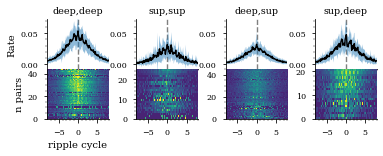

<Figure size 460.8x316.8 with 0 Axes>

In [12]:
t = np.hstack(data['t'])

fig, axs = plt.subplots(2,4, figsize=functions.set_size('thesis', fraction=1, subplots=(2,4)), edgecolor='k')
fig.subplots_adjust(hspace = 0, wspace=0.45)
axs = axs.ravel()

max_val = data['ccg'].mean() + data['ccg'].std()
min_val = data['ccg'].mean() - data['ccg'].std() / 1.5

mean_ccg = get_mean_cycle_ccg(data,'Deep','Deep')
axs[0].fill_between(t,
                np.mean(mean_ccg,axis=0)-np.std(mean_ccg,axis=0),
                np.mean(mean_ccg,axis=0)+np.std(mean_ccg,axis=0),
                alpha=.5,label='deep')
axs[0].plot(t,np.mean(mean_ccg,axis=0),color='k')

mean_ccg = get_mean_cycle_ccg(data,'Superficial','Superficial')
axs[1].fill_between(t,
                np.mean(mean_ccg,axis=0)-np.std(mean_ccg,axis=0),
                np.mean(mean_ccg,axis=0)+np.std(mean_ccg,axis=0),
                alpha=.5,label='sup')
axs[1].plot(t,np.mean(mean_ccg,axis=0),color='k')
# plt.legend()

plt.figure()
mean_ccg = get_mean_cycle_ccg(data,'Deep','Superficial')
axs[2].fill_between(t,
                np.mean(mean_ccg,axis=0)-np.std(mean_ccg,axis=0),
                np.mean(mean_ccg,axis=0)+np.std(mean_ccg,axis=0),
                alpha=.5,label='deep,sup')
axs[2].plot(t,np.mean(mean_ccg,axis=0),color='k')

mean_ccg = get_mean_cycle_ccg(data,'Superficial','Deep')
axs[3].fill_between(t,
                np.mean(mean_ccg,axis=0)-np.std(mean_ccg,axis=0),
                np.mean(mean_ccg,axis=0)+np.std(mean_ccg,axis=0),
                alpha=.5,label='sup,deep')
axs[3].plot(t,np.mean(mean_ccg,axis=0),color='k')

mean_ccg = get_mean_cycle_ccg(data,'Deep','Deep')
idx = np.argsort(-mean_ccg[:,t==0].T)[0]
axs[4].imshow(mean_ccg[idx],aspect='auto',interpolation='nearest',extent=[t.min(),t.max(),0,len(mean_ccg)],vmax=max_val,vmin=min_val)

mean_ccg = get_mean_cycle_ccg(data,'Superficial','Superficial')
idx = np.argsort(-mean_ccg[:,t==0].T)[0]
axs[5].imshow(mean_ccg,aspect='auto',interpolation='nearest',extent=[t.min(),t.max(),0,len(mean_ccg)],vmax=max_val,vmin=min_val)

mean_ccg = get_mean_cycle_ccg(data,'Deep','Superficial')
idx = np.argsort(-mean_ccg[:,t==0].T)[0]
axs[6].imshow(mean_ccg,aspect='auto',interpolation='nearest',extent=[t.min(),t.max(),0,len(mean_ccg)],vmax=max_val,vmin=min_val)

mean_ccg = get_mean_cycle_ccg(data,'Superficial','Deep')
idx = np.argsort(-mean_ccg[:,t==0].T)[0]
axs[7].imshow(mean_ccg,aspect='auto',interpolation='nearest',extent=[t.min(),t.max(),0,len(mean_ccg)],vmax=max_val,vmin=min_val)

axs[4].set_xlabel('ripple cycle')
axs[4].set_ylabel('n pairs')

axs[0].set_ylabel('Rate')

axs[0].set_xlim(t.min(),t.max())
axs[1].set_xlim(t.min(),t.max())
axs[2].set_xlim(t.min(),t.max())
axs[3].set_xlim(t.min(),t.max())

axs[0].set_ylim(min_val,max_val)
axs[1].set_ylim(min_val,max_val)
axs[2].set_ylim(min_val,max_val)
axs[3].set_ylim(min_val,max_val)

for i in range(8):
    axs[i].spines["right"].set_visible(False)
    axs[i].spines["top"].set_visible(False)
    axs[i].xaxis.set_minor_locator(AutoMinorLocator())
    axs[i].yaxis.set_minor_locator(AutoMinorLocator())

axs[0].set_title('deep,deep')
axs[1].set_title('sup,sup')
axs[2].set_title('deep,sup')
axs[3].set_title('sup,deep')

axs[0].axvline(0,zorder=-1000,color='grey',ls='--')
axs[1].axvline(0,zorder=-1000,color='grey',ls='--')
axs[2].axvline(0,zorder=-1000,color='grey',ls='--')
axs[3].axvline(0,zorder=-1000,color='grey',ls='--')


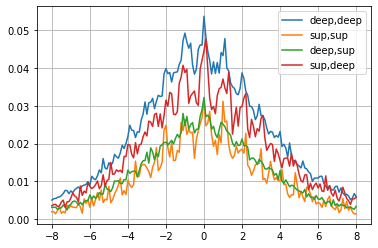

In [234]:
mean_ccg = get_mean_cycle_ccg(data,'Deep','Deep')
plt.plot(t,np.mean(mean_ccg,axis=0),label='deep,deep')
mean_ccg = get_mean_cycle_ccg(data,'Superficial','Superficial')
plt.plot(t,np.mean(mean_ccg,axis=0),label='sup,sup')
mean_ccg = get_mean_cycle_ccg(data,'Deep','Superficial')
plt.plot(t,np.mean(mean_ccg,axis=0),label='deep,sup')
mean_ccg = get_mean_cycle_ccg(data,'Superficial','Deep')
plt.plot(t,np.mean(mean_ccg,axis=0),label='sup,deep')
plt.legend()
plt.grid()

In [ ]:
files = glob.glob(r'Z:\home\ryanh\projects\ripple_heterogeneity\ccg_deep_sup\*.mat')
mean_ccg_dd = []
mean_ccg_ss = []
mean_ccg_ds = []
mean_ccg_sd = []

for file in files:
    data = load_ccg_file(file)
    mean_ccg_dd.append(get_mean_cycle_ccg(data,'Deep','Deep'))
    mean_ccg_ss.append(get_mean_cycle_ccg(data,'Superficial','Superficial'))
    mean_ccg_ds.append(get_mean_cycle_ccg(data,'Deep','Superficial'))
    mean_ccg_sd.append(get_mean_cycle_ccg(data,'Superficial','Deep'))

